While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:


Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.


As final considerations:


You must use the Pandas Library and the Jupyter Notebook.
You must use the Matplotlib library.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
Your scatter plots must include error bars. This will allow the company to account for variability between mice. You may want to look into pandas.DataFrame.sem for ideas on how to calculate this.
Remember when making your plots to consider aesthetics!


Your legends should not be overlaid on top of any data.
Your bar graph should indicate tumor growth as red and tumor reduction as green.
It should also include a label with the percentage change for each bar. You may want to consult this tutorial for relevant code snippets.


See Starter Workbook for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)



Hints and Considerations


Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.
You have been provided a starter notebook. Use the code comments as a guideline of steps you may wish to follow as you complete the assignment. You do not have to follow them step-for-step. Do not get bogged down in trying to interpret and accomplish each step.
Between these two exercises, the Pymaceuticals one is significantly more challenging. So choose that one only if you feel somewhat comfortable with the material covered so far. The Pymaceuticals example will require you to research a good bit on your own for hacked solutions to problems you'll experience along the way. If you end up choosing this exercise, feel encouraged to constantly refer to Stack Overflow and the Pandas Documentation. These are needed tools in every data analyst's arsenal.
Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always re-visit old problems.
Remember: There are many ways to skin a cat, and similarly there are many ways to approach a data problem. The key throughout, however, is to break up your task into micro tasks. Try answering questions like: "How does my Data Frame need to be structured for me to have the right X and Y axis?" "How do I build a basic scatter plot?" "How do I add a label to that scatter plot?" "Where would the labels for that scatter plot come from?". Again! Don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of smaller, bite-sized tasks.
Get help when you need it! There is never any shame in asking. But as always, ask a specific question. You'll never get a great answer to: "I'm lost." Good luck!

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinical_trial_df,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_drug_timept = combined_df.groupby(['Drug', 'Timepoint'])["Tumor Volume (mm3)"]
mean_tumor_df = group_drug_timept.mean()

# Convert to DataFrame
mean_tumor_df = mean_tumor_df.reset_index()

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_drug_timept = combined_df.groupby(['Drug', 'Timepoint'])["Tumor Volume (mm3)"]
std_er_tumor = group_drug_timept.sem()
tumor_standard_errors_df = pd.DataFrame(std_er_tumor)

# Convert to DataFrame
tumor_standard_errors_df.reset_index(inplace = True)

# Preview DataFrame
tumor_standard_errors_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
pivot_df = mean_tumor_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#Make Std Error pivot to easily access the values for plotting
std_err_pivot = tumor_standard_errors_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


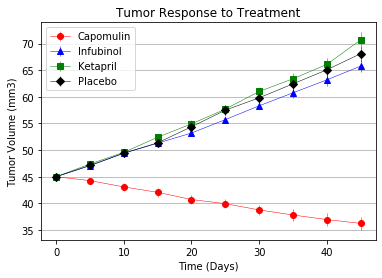

In [6]:
# Generate the Plot (with Error Bars)
x_axis = pivot_df.index
plt.errorbar(x_axis, pivot_df["Capomulin"],std_err_pivot['Capomulin'], linewidth=.5, marker="o", color="red", label="Capomulin")
plt.errorbar(x_axis, pivot_df["Infubinol"],std_err_pivot['Infubinol'], linewidth=.5, marker="^", color="blue", label="Infubinol")
plt.errorbar(x_axis, pivot_df["Ketapril"],std_err_pivot['Ketapril'], linewidth=.5, marker="s", color="green",label="Ketapril")
plt.errorbar(x_axis, pivot_df["Placebo"],std_err_pivot['Placebo'], linewidth=.5, marker="D", color="black",label="Placebo")

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')

# Save the Figure
plt.savefig("Images/treatment.png")

#Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_met = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
mean_met = group_met.mean()

# Convert to DataFrame
#Use mean_met_df_format to get the formatting desired but we want to use mean_met_df for indexing later
mean_met_df_format = pd.DataFrame(mean_met)
mean_met_df = mean_met.reset_index()

# Preview DataFrame
mean_met_df_format.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_er_met = group_met.sem()

# Convert to DataFrame
#Use std_er_df_format to get the formatting desired but we want to use mean_met_df for indexing later
std_er_met_df_format = pd.DataFrame(std_er_met)
std_er_met_df = std_er_met.reset_index()

# Preview DataFrame
std_er_met_df_format.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot_df = mean_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
#Make Std Error pivot to easily access the values for plotting

met_std_err_pivot = std_er_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


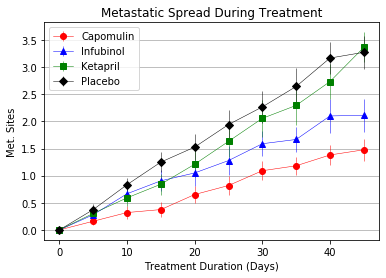

In [10]:
# Generate the Plot (with Error Bars)

x_axis = met_pivot_df.index
plt.errorbar(x_axis, met_pivot_df["Capomulin"],met_std_err_pivot['Capomulin'], linewidth=.5, marker="o", color="red", label="Capomulin")
plt.errorbar(x_axis, met_pivot_df["Infubinol"],met_std_err_pivot['Infubinol'], linewidth=.5, marker="^", color="blue", label="Infubinol")
plt.errorbar(x_axis, met_pivot_df["Ketapril"],met_std_err_pivot['Ketapril'], linewidth=.5, marker="s", color="green",label="Ketapril")
plt.errorbar(x_axis, met_pivot_df["Placebo"],met_std_err_pivot['Placebo'], linewidth=.5, marker="D", color="black",label="Placebo")

plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(axis='y')

# Save the Figure
plt.savefig("Images/spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_mice = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"]
count_mice = group_mice.nunique()

# Convert to DataFrame
count_mice_df = count_mice.reset_index()
count_mice_df=count_mice_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
count_mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_pivot = count_mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
count_mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


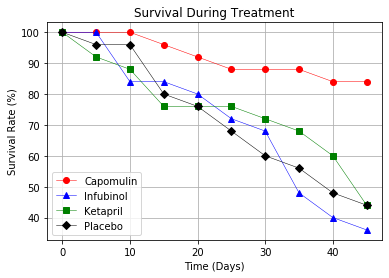

In [13]:
#Do calculations to get survival rates
start_mice_count = 25
suv_rt_capomulin = (count_mice_pivot["Capomulin"]/start_mice_count)*100
suv_rt_infubinol = (count_mice_pivot["Infubinol"]/start_mice_count)*100
suv_rt_ketapril = (count_mice_pivot["Ketapril"]/start_mice_count)*100
suv_rt_placebo = (count_mice_pivot["Placebo"]/start_mice_count)*100

# Generate the Plot (Accounting for percentages)
x_axis = count_mice_pivot.index
plt.plot(x_axis, suv_rt_capomulin, linewidth=.5, marker="o", color="red", label="Capomulin")
plt.plot(x_axis, suv_rt_infubinol, linewidth=.5, marker="^", color="blue", label="Infubinol")
plt.plot(x_axis, suv_rt_ketapril, linewidth=.5, marker="s", color="green",label="Ketapril")
plt.plot(x_axis, suv_rt_placebo, linewidth=.5, marker="D", color="black",label="Placebo")

plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig("Images/survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percentage_change = (pivot_df.iloc[-1]/(pivot_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

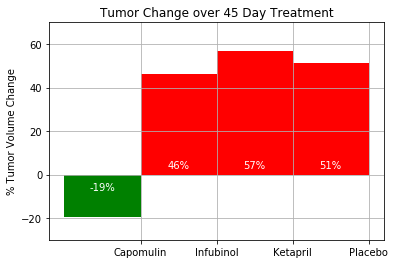

In [15]:
# Store all Relevant Percent Changes into a Tuple
tuple(percentage_change)

# Splice the data between passing and failing drugs
passing = percentage_change < 0
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
pct_change = [(percentage_change[drug])for drug in drugs]
change_bar = plt.bar(drugs,pct_change,width=-1,align='edge',color=passing.map({True:'green',False:'red'}))

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_bar)

# Save the Figure
plt.savefig("Images/change.png")

# Show the Figure
plt.show()

Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations:
1) From the "Tumor Response to Treatment" graph as well as the "Tumor Change over 45 Day Treatment", we can see that Capomulin was the only drug that effectively decreased the volume of the tumor.
2) As Seen in the "Survival During Treatment" graph, Capomulin produced survival rates almost double the two other drugs and placebo. Patients who took Infubinol actually had lower survival rates than the placebo.
3) Capomulin had the lowest metastatic spread over treatment, followed by Infubinol and then Ketapril, which actually was worse than the placebo at the end of treatment. Despite having the second lowest metastatic spread over treatment, Infubinol actually managed to have worse survival rates than the placebo.